In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz

--2019-09-04 10:30:48--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.126
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.73.126|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  3.98MB/s    in 6.3s    

2019-09-04 10:30:54 (4.01 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]



In [4]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2019-09-04 10:32:10--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.15
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.74.15|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29515 (29K) [binary/octet-stream]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.82K  --.-KB/s    in 0.05s   

2019-09-04 10:32:10 (554 KB/s) - ‘train-labels-idx1-ubyte.gz’ saved [29515/29515]

--2019-09-04 10:32:10--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.15
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fas

In [5]:
!mkdir MNIST_Fashion
!cp *.gz MNIST_Fashion
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_Fashion")

W0904 10:33:19.302932 139735013676864 deprecation.py:323] From <ipython-input-5-8fcda8c18064>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0904 10:33:19.303496 139735013676864 deprecation.py:323] From /root/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0904 10:33:19.304321 139735013676864 deprecation.py:323] From /root/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
I

Extracting MNIST_Fashion/train-images-idx3-ubyte.gz


W0904 10:33:19.540378 139735013676864 deprecation.py:323] From /root/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0904 10:33:19.587858 139735013676864 deprecation.py:323] From /root/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting MNIST_Fashion/train-labels-idx1-ubyte.gz
Extracting MNIST_Fashion/t10k-images-idx3-ubyte.gz
Extracting MNIST_Fashion/t10k-labels-idx1-ubyte.gz


In [53]:
learning_rate = 0.0002
batch_size = 128
epochs = 1000000

image_dim = 784
gen_hidd_dim = 256
disc_hidd_dim = 256
z_noise_dim = 100

def xavier_init(shape):
    
    return tf.random_normal(shape = shape, stddev = 1./tf.sqrt(shape[0]/2.0))

In [54]:
weights = {"disc_H": tf.Variable(xavier_init([image_dim, disc_hidd_dim])),
          "disc_final": tf.Variable(xavier_init([disc_hidd_dim, 1])),
          "gen_H": tf.Variable(xavier_init([z_noise_dim, gen_hidd_dim])),
          "gen_final": tf.Variable(xavier_init([gen_hidd_dim, image_dim]))}

bias = {"disc_H": tf.Variable(xavier_init([disc_hidd_dim])),
       "disc_final": tf.Variable(xavier_init([1])),
       "gen_H": tf.Variable(xavier_init([gen_hidd_dim])),
       "gen_final": tf.Variable(xavier_init([image_dim]))}

In [55]:
def  Discriminator(x):
    hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, weights["disc_H"]), bias["disc_H"]))
    final_layer = tf.add(tf.matmul(hidden_layer, weights["disc_final"]), bias["disc_final"])
    disc_output = tf.nn.sigmoid(final_layer)
    return final_layer, disc_output

def Generator(x):
    hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, weights["gen_H"]), bias["gen_H"]))
    final_layer  = tf.add(tf.matmul(hidden_layer, weights["gen_final"]), bias["gen_final"])
    gen_output = tf.nn.sigmoid(final_layer)
    return gen_output

Z_input = tf.placeholder(tf.float32, shape = [None, z_noise_dim], name= "input_noise")
X_input = tf.placeholder(tf.float32, shape = [None, image_dim], name = "real_input")

#Building the Generator Network
with tf.name_scope("Generator") as scope:
    output_Gen = Generator(Z_input)

#Building the Discriminator Network
with tf.name_scope("Discriminator") as scope:
    real_output1_Disc, real_output_Disc = Discriminator(X_input)   #Implement D(x)
    fake_output1_Disc, fake_output_Disc = Discriminator(output_Gen)#Implement D(G(x))

In [56]:
with tf.name_scope("Discriminator_Loss") as scope:
    Discriminator_Loss = -tf.reduce_mean(tf.log(real_output_Disc + 0.0001) + tf.log(1. - fake_output_Disc + 0.0001))

with tf.name_scope("Generator_Loss") as scope:
    Generator_Loss = -tf.reduce_mean(tf.log(fake_output_Disc + 0.0001)) #due to max log(D(G(x)))
    
#TensorBoard
Disc_loss_total = tf.summary.scalar("Disc_Total_loss", Discriminator_Loss)
Gen_loss_total = tf.summary.scalar("Gen_Total_loss", Generator_Loss)


In [57]:
# Define the variables

Generator_var = [weights["gen_H"], weights["gen_final"], bias["gen_H"], bias["gen_final"]]
Discriminator_var = [weights["disc_H"], weights["disc_final"], bias["disc_H"], bias["disc_final"]]


#Define the optimizer 
with tf.name_scope("Optimizer_Discriminator") as scope:
    Discriminator_optimizer =tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(Discriminator_Loss, var_list=Discriminator_var)

    
    
with tf.name_scope("Optimizer_Generator") as scope:
    Generator_optimizer =tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(Generator_Loss, var_list=Generator_var)

In [58]:
#initializer the variables
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
writer = tf.summary.FileWriter('./log', sess.graph)

for epoch in range(epochs):
    X_batch, _ = mnist.train.next_batch(batch_size)

    #Generate noise to fed the discriminator
    Z_noise = np.random.uniform(-1.,1., size = [batch_size, z_noise_dim])
    _, Disc_loss_epoch = sess.run([Discriminator_optimizer, Discriminator_Loss], feed_dict={X_input:X_batch, Z_input:Z_noise})
    _, Gen_loss_epoch = sess.run([Generator_optimizer, Generator_Loss], feed_dict={Z_input:Z_noise})

    #Running the Discriminator summary 
    summary_Disc_Loss = sess.run(Disc_loss_total, feed_dict={X_input:X_batch, Z_input:Z_noise})
    #Adding the Discriminator summary 
    writer.add_summary(summary_Disc_Loss, epoch)

    #Running the Generator sumarry
    summary_Gen_Loss = sess.run(Gen_loss_total, feed_dict={Z_input:Z_noise})
    #Adding the Generator summary
    writer.add_summary(summary_Gen_Loss,epoch) 

    if epoch % 2000 == 0:
        print("Steps : {0} : Generator Loss: {1},  discriminator Loss: {2}".format(epoch, Gen_loss_epoch, Disc_loss_epoch))

Steps : 0 : Generator Loss: 0.9922066926956177,  discriminator Loss: 1.228214979171753
Steps : 2000 : Generator Loss: 2.8106775283813477,  discriminator Loss: 0.22656133770942688
Steps : 4000 : Generator Loss: 2.5296130180358887,  discriminator Loss: 0.2988753914833069
Steps : 6000 : Generator Loss: 2.5921239852905273,  discriminator Loss: 0.28364697098731995
Steps : 8000 : Generator Loss: 2.4214537143707275,  discriminator Loss: 0.3660961985588074
Steps : 10000 : Generator Loss: 2.5153861045837402,  discriminator Loss: 0.46092739701271057
Steps : 12000 : Generator Loss: 2.3748626708984375,  discriminator Loss: 0.34709426760673523
Steps : 14000 : Generator Loss: 2.6661548614501953,  discriminator Loss: 0.3844848871231079
Steps : 16000 : Generator Loss: 2.1387298107147217,  discriminator Loss: 0.516196072101593
Steps : 18000 : Generator Loss: 1.9748351573944092,  discriminator Loss: 0.638729989528656
Steps : 20000 : Generator Loss: 2.667239189147949,  discriminator Loss: 0.4890739321708

Steps : 180000 : Generator Loss: 1.7141700983047485,  discriminator Loss: 1.1831520795822144
Steps : 182000 : Generator Loss: 1.8253772258758545,  discriminator Loss: 0.8400079607963562
Steps : 184000 : Generator Loss: 1.9430601596832275,  discriminator Loss: 0.8781734704971313
Steps : 186000 : Generator Loss: 1.5715787410736084,  discriminator Loss: 0.9087289571762085
Steps : 188000 : Generator Loss: 1.9926846027374268,  discriminator Loss: 1.194643497467041
Steps : 190000 : Generator Loss: 2.2683682441711426,  discriminator Loss: 1.09999418258667
Steps : 192000 : Generator Loss: 1.7309556007385254,  discriminator Loss: 1.0238466262817383
Steps : 194000 : Generator Loss: 1.5263627767562866,  discriminator Loss: 1.219524621963501
Steps : 196000 : Generator Loss: 1.4178314208984375,  discriminator Loss: 0.9404690265655518
Steps : 198000 : Generator Loss: 1.5723960399627686,  discriminator Loss: 1.2343627214431763
Steps : 200000 : Generator Loss: 1.6054922342300415,  discriminator Loss: 

Steps : 358000 : Generator Loss: 1.554931402206421,  discriminator Loss: 0.977598249912262
Steps : 360000 : Generator Loss: 1.2796903848648071,  discriminator Loss: 1.0105113983154297
Steps : 362000 : Generator Loss: 1.110990047454834,  discriminator Loss: 0.8685899972915649
Steps : 364000 : Generator Loss: 1.505152702331543,  discriminator Loss: 0.9042741060256958
Steps : 366000 : Generator Loss: 1.0892763137817383,  discriminator Loss: 1.0726041793823242
Steps : 368000 : Generator Loss: 1.242917537689209,  discriminator Loss: 1.0336291790008545
Steps : 370000 : Generator Loss: 1.3214359283447266,  discriminator Loss: 1.0825929641723633
Steps : 372000 : Generator Loss: 1.3019495010375977,  discriminator Loss: 1.1169135570526123
Steps : 374000 : Generator Loss: 1.2011418342590332,  discriminator Loss: 0.9564172029495239
Steps : 376000 : Generator Loss: 1.4379099607467651,  discriminator Loss: 1.0747497081756592
Steps : 378000 : Generator Loss: 1.331600546836853,  discriminator Loss: 0.

Steps : 536000 : Generator Loss: 1.1316183805465698,  discriminator Loss: 1.0515849590301514
Steps : 538000 : Generator Loss: 1.1480821371078491,  discriminator Loss: 0.9847011566162109
Steps : 540000 : Generator Loss: 1.23250412940979,  discriminator Loss: 0.9927712678909302
Steps : 542000 : Generator Loss: 1.2180569171905518,  discriminator Loss: 1.030377984046936
Steps : 544000 : Generator Loss: 1.1901665925979614,  discriminator Loss: 1.0492879152297974
Steps : 546000 : Generator Loss: 1.2381917238235474,  discriminator Loss: 0.9199559688568115
Steps : 548000 : Generator Loss: 1.2688186168670654,  discriminator Loss: 0.9768855571746826
Steps : 550000 : Generator Loss: 1.2282034158706665,  discriminator Loss: 1.1262270212173462
Steps : 552000 : Generator Loss: 1.1553956270217896,  discriminator Loss: 1.020561695098877
Steps : 554000 : Generator Loss: 1.2900965213775635,  discriminator Loss: 1.0611786842346191
Steps : 556000 : Generator Loss: 1.1138041019439697,  discriminator Loss: 

Steps : 714000 : Generator Loss: 1.2994489669799805,  discriminator Loss: 0.8495079874992371
Steps : 716000 : Generator Loss: 1.3153676986694336,  discriminator Loss: 0.8932839632034302
Steps : 718000 : Generator Loss: 1.3439266681671143,  discriminator Loss: 0.9031095504760742
Steps : 720000 : Generator Loss: 1.2457611560821533,  discriminator Loss: 0.9745681881904602
Steps : 722000 : Generator Loss: 1.2478392124176025,  discriminator Loss: 0.9678456783294678
Steps : 724000 : Generator Loss: 1.2891991138458252,  discriminator Loss: 0.9439927339553833
Steps : 726000 : Generator Loss: 1.3176748752593994,  discriminator Loss: 0.9407429695129395
Steps : 728000 : Generator Loss: 1.1787792444229126,  discriminator Loss: 1.058428168296814
Steps : 730000 : Generator Loss: 1.4587209224700928,  discriminator Loss: 0.9198670387268066
Steps : 732000 : Generator Loss: 1.258056879043579,  discriminator Loss: 0.8638859391212463
Steps : 734000 : Generator Loss: 1.3027440309524536,  discriminator Loss

Steps : 892000 : Generator Loss: 1.3895009756088257,  discriminator Loss: 0.7654829621315002
Steps : 894000 : Generator Loss: 1.4107742309570312,  discriminator Loss: 0.9029884934425354
Steps : 896000 : Generator Loss: 1.3038859367370605,  discriminator Loss: 0.9201488494873047
Steps : 898000 : Generator Loss: 1.2732816934585571,  discriminator Loss: 0.9395279884338379
Steps : 900000 : Generator Loss: 1.4026519060134888,  discriminator Loss: 0.9782307744026184
Steps : 902000 : Generator Loss: 1.3912665843963623,  discriminator Loss: 0.845714271068573
Steps : 904000 : Generator Loss: 1.3888969421386719,  discriminator Loss: 0.8479669094085693
Steps : 906000 : Generator Loss: 1.3647562265396118,  discriminator Loss: 0.8855248689651489
Steps : 908000 : Generator Loss: 1.635534644126892,  discriminator Loss: 0.8778730034828186
Steps : 910000 : Generator Loss: 1.5119585990905762,  discriminator Loss: 0.7430754899978638
Steps : 912000 : Generator Loss: 1.4788708686828613,  discriminator Loss

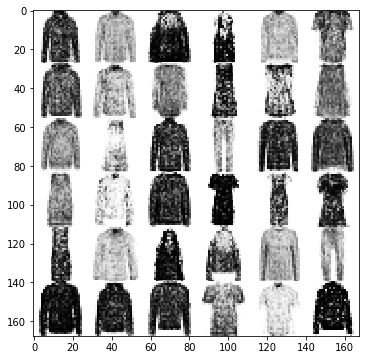

In [59]:
#Testing

n = 6 
canvas = np.empty((28 * n, 28* n))

for i in range(n):
    z_noise = np.random.uniform(-1.0,1.,size = [batch_size, z_noise_dim])
    #Generate image from noise
    g = sess.run(output_Gen, feed_dict={Z_input: z_noise})
    #Reverse colours for better display
    g = -1 * (g -1)
    for j in range(n):
        #Draw de generated digits 
        canvas[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])
        
        

plt.figure(figsize=(n,n))
plt.imshow(canvas, origin="upper", cmap="gray")
plt.show()

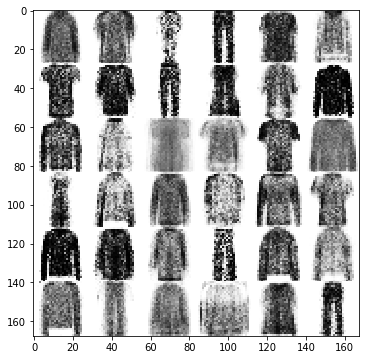

In [52]:
#Testing

n = 6 
canvas = np.empty((28 * n, 28* n))

for i in range(n):
    z_noise = np.random.uniform(-1.0,1.,size = [batch_size, z_noise_dim])
    #Generate image from noise
    g = sess.run(output_Gen, feed_dict={Z_input: z_noise})
    #Reverse colours for better display
    g = -1 * (g -1)
    for j in range(n):
        #Draw de generated digits 
        canvas[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])
        
        

plt.figure(figsize=(n,n))
plt.imshow(canvas, origin="upper", cmap="gray")
plt.show()